## Compulsory Task 1

Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


Hemant Thapa

In [73]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval
from pandas.io.json import json_normalize
from matplotlib.ticker import FormatStrFormatter
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [74]:
#### load the movie dataset and create their dataframes
movies_df = pd.read_csv('movies.csv')
movies_df.tail(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [75]:
#Type of columns
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [76]:
#Total numbers of columns and rows
movies_df.shape

(4803, 20)

In [77]:
#Checking Datatypes
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [78]:
#removing unnecessary columns
movies_df.drop(columns=['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'],inplace=True)
movies_df.tail(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",25975,1.929883,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",My Date with Drew,6.3,16


#### Remove any duplicate rows

In [79]:
#Checking numbers of columns
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [80]:
#Removing duplicate rows
movies_df.columns = movies_df.columns.drop_duplicates()

In [81]:
#Checking colums
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [82]:
#Checking null values
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [83]:
#removing null values or zero budget
movies_df = movies_df.dropna(subset=['budget','revenue'])
movies_df.tail(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",25975,1.929883,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",My Date with Drew,6.3,16


In [84]:
#Mean value
movies_df["budget"].mean()

29045039.87528628

In [85]:
#Cecking columns and rows before removing null value
movies_df.shape

(4803, 12)

In [86]:
#Inspecting all dataset
movies_df.budget.unique()

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

In [87]:
# count the number of zeroes in the budget column
zero_count = (movies_df['budget'] == 0).sum()
print("Number of zeroes in the budget column:", zero_count)

Number of zeroes in the budget column: 1037


In [88]:
# count the number of zeroes in the budget column
zero_count = (movies_df['revenue'] == 0).sum()
print("Number of zeroes in the budget column:", zero_count)

Number of zeroes in the budget column: 1427


In [89]:
#remove entries with zero budget and zero revenue
movies_df = movies_df.query('budget !=0 and revenue !=0')

In [90]:
movies_df.tail(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238


In [91]:
#Columns and row after clearing null values
movies_df.shape

(3229, 12)

In [92]:
movies_df.budget.unique()

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000, 165000000,
       160000000,  15000000,  38000000, 155000000, 149000000, 144000000,
        70000000, 100000000, 139000000, 135000000, 130000000, 137000000,
       120000000, 132000000, 110000000, 125000000, 127500000, 127000000,
       103000000,  65000000, 123000000, 115000000, 117000000, 113000000,
        97250400, 116000000, 112000000,  93000000, 107000000, 133000000,
       108000000, 126000000,  90000000, 102000000,  80000000,  99000000,
        10000000,  98000000,  94000000,  85000000,  92000000,  95000000,
        79000000,  75000000,  88000000,  68000000,  20000000,  87000000,
        60000000,  84000000,  50000000,  82500000, 

In [93]:
# count the number of zeroes in the budget column
#no more zero value in budget
zero_count = (movies_df['budget'] == 0).sum()
print("Number of zeroes in the budget column:", zero_count)

Number of zeroes in the budget column: 0


In [94]:
# count the number of zeroes in the budget column
#No more zero value in revenue
zero_count = (movies_df['revenue'] == 0).sum()
print("Number of zeroes in the budget column:", zero_count)

Number of zeroes in the budget column: 0


In [95]:
#All null values has been discard
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [96]:
movies_df.tail(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [97]:
# Change the release_date column to DateTime column
movies_df = movies_df.rename(columns={'release_date': 'DateTime'})
movies_df.tail(2)

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238


In [98]:
# Extract the release year from every release date
# extract year and create new column

# Convert the 'release_date' column to datetime using the datetime.strptime() function
movies_df['DateTime'] = movies_df['DateTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Extract the year from the 'release_date' column and create a new column 'year'
movies_df['year'] = movies_df['DateTime'].apply(lambda x: x.year)

In [99]:
movies_df.tail(2)

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238,1992


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [100]:
# change data type
movies_df['budget'] =movies_df['budget'].astype(np.int64)
movies_df['revenue'] =movies_df['revenue'].astype(np.int64)

In [101]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   DateTime              3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  year                  3229 non-null   int64         
dtypes: datetime64[ns](

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [102]:
movies_df.tail(3)

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238,1992


In [103]:
#Playing with json file and finding insight
movies_df['genres'] = movies_df['genres'].apply(json.loads)
movies_df['genres'] = movies_df['genres'].apply(lambda x: [i['name'] for i in x])
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(json.loads)
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(lambda x: [i['name'] for i in x])
movies_df['production_countries'] = movies_df['production_countries'].apply(json.loads)
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: [i['name'] for i in x])

In [104]:
movies_df.head(2)

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,2009
1,300000000,"[Adventure, Fantasy, Action]",285,139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,2007


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [105]:
movies_df

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,2009
1,300000000,"[Adventure, Fantasy, Action]",285,139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[Action, Adventure, Crime]",206647,107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466,2015
3,250000000,"[Action, Crime, Drama, Thriller]",49026,112.312950,[United States of America],2012-07-16,1084939099,165.0,[English],The Dark Knight Rises,7.6,9106,2012
4,260000000,"[Action, Adventure, Science Fiction]",49529,43.926995,[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,[Comedy],2292,19.748658,[United States of America],1994-09-13,3151130,92.0,[English],Clerks,7.4,755,1994
4788,12000,"[Horror, Comedy, Crime]",692,4.553644,[United States of America],1972-03-12,6000000,93.0,[English],Pink Flamingos,6.2,110,1972
4792,20000,"[Crime, Horror, Mystery, Thriller]",36095,0.212443,[Japan],1997-11-06,99000,111.0,[日本語],Cure,7.4,63,1997
4796,7000,"[Science Fiction, Drama, Thriller]",14337,23.307949,[United States of America],2004-10-08,424760,77.0,[English],Primer,6.9,658,2004


#### 1. Top 5 movie budget

In [106]:
# Sort the dataframe by budget in descending order
movies_df.sort_values(by='budget', ascending=False, inplace=True)

# Select the top 5 movies by budget
top_5_expensive_movies_budget = movies_df.head(5)

# Print the top 5 most expensive movies
top_5_expensive_movies_budget

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
17,380000000,"[Adventure, Action, Fantasy]",1865,135.413856,[United States of America],2011-05-14,1045713802,136.0,"[English, Español]",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"[Adventure, Fantasy, Action]",285,139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"[Action, Adventure, Science Fiction]",99861,134.279229,[United States of America],2015-04-22,1405403694,141.0,[English],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"[Adventure, Fantasy, Action, Science Fiction]",1452,57.925623,[United States of America],2006-06-28,391081192,154.0,"[English, Français, Deutsch]",Superman Returns,5.4,1400,2006
4,260000000,"[Action, Adventure, Science Fiction]",49529,43.926995,[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,2012


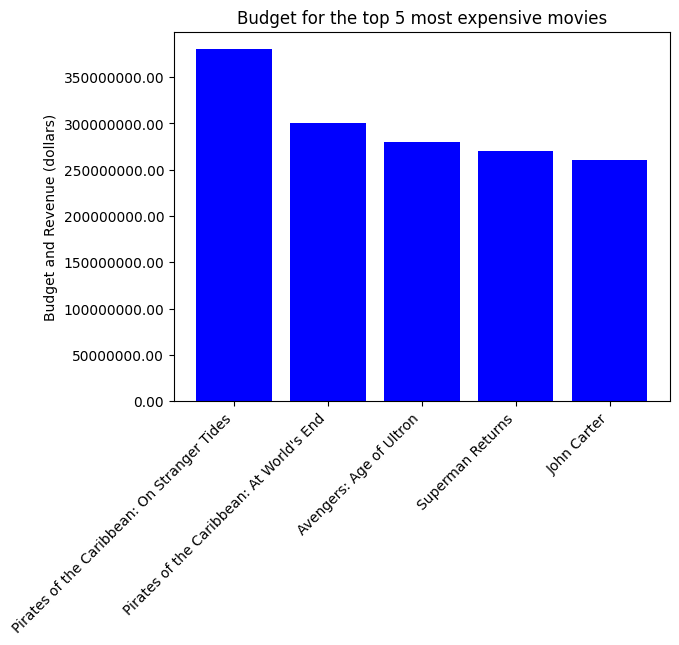

In [107]:
plt.bar(top_5_expensive_movies_budget['title'], top_5_expensive_movies_budget['budget'], color='b')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylabel('Budget and Revenue (dollars)')
plt.title('Budget for the top 5 most expensive movies')
plt.show()

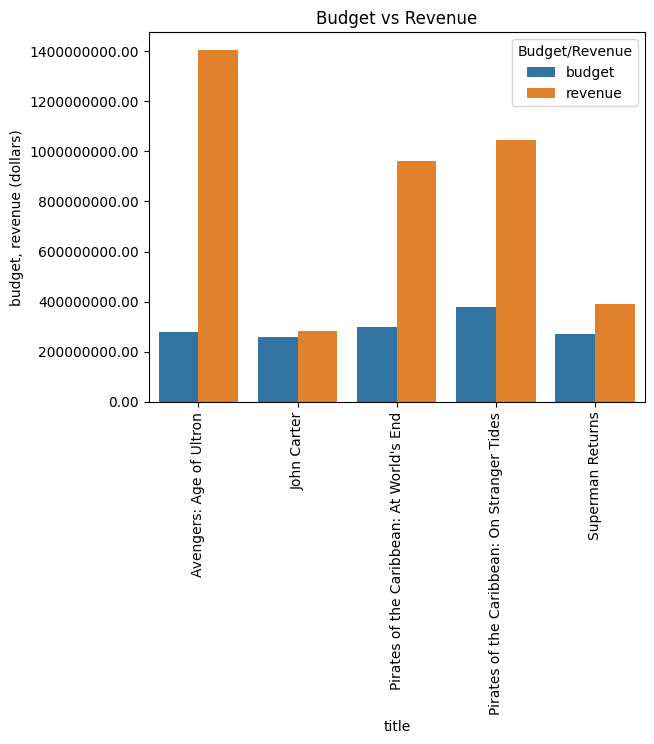

In [108]:
chart_data = top_5_expensive_movies_budget[['title','budget','revenue']].sort_values(['title'])
chart_data = chart_data.dropna()
chart_data = chart_data.melt(id_vars =['title'], value_vars=['budget','revenue'], var_name = 'Budget/Revenue')
sns.barplot(x = 'title', y = 'value', hue = 'Budget/Revenue', data = chart_data)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Budget vs Revenue')
plt.ylabel('budget, revenue (dollars)')
plt.xticks(rotation=90)
plt.show()

### Comparion between Budget and revenue between top 5 movies

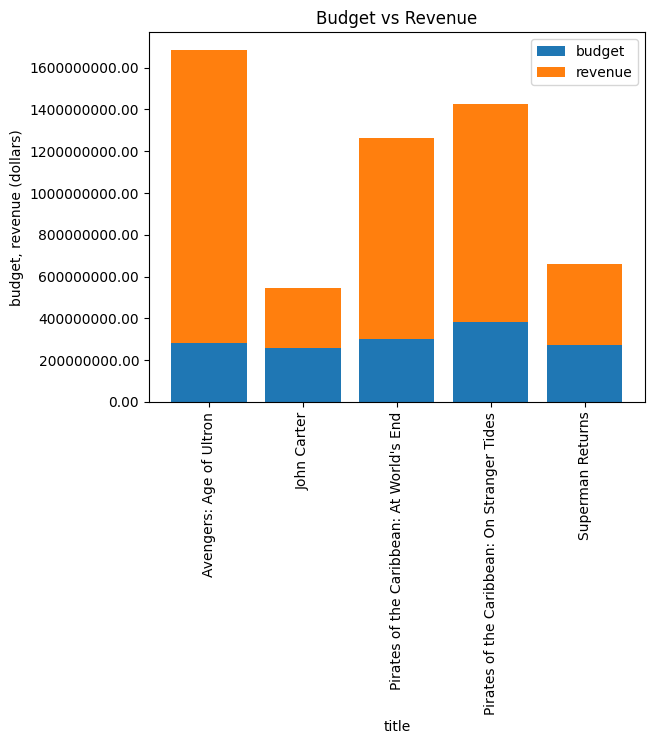

In [109]:
if isinstance(top_5_expensive_movies_budget, pd.DataFrame):
    chart_data = top_5_expensive_movies_budget[['title','budget','revenue']].sort_values(['title'])
    chart_data = chart_data.dropna()
    x = chart_data['title']
    y1 = chart_data['budget']
    y2 = chart_data['revenue']
    fig, ax = plt.subplots()
    ax.bar(x, y1, label='budget')
    ax.bar(x, y2, bottom=y1, label='revenue')
    ax.legend()
    plt.title('Budget vs Revenue')
    plt.xlabel('title')
    plt.ylabel('budget, revenue (dollars)')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.show()


1. Pirates of the Caribbean: On Stranger Tides has 380 million dollars on budget and revenue generated was 1045.71 million dollars, where, movie has made 665.71 million dollars of pure profit after deducting the investment.

2. Avengers Age of ultron has budget of 280 millions dollars and revenue generated was 1405.40 million dollars, where after deducting investment, pure profit was 1125.40 million dollars

3. John Carter budget was lowest on top five movie, which was 260 million dollars and revenue genrated was very low as compare to other movies, total revenue was 284.13 million dollars, if we subtract investment and pure profit was 24million dollars

#### 2. Top 5 Revenue generated movie

In [110]:
top_5_high_revenue_movies['profit'] = top_5_high_revenue_movies['revenue'] - top_5_high_revenue_movies['budget']
top_5_expensive_movies_budget['profit'] = top_5_expensive_movies_budget['revenue'] - top_5_expensive_movies_budget['budget']

/var/folders/bh/v9rbvs_x0vb4x2901_k83_tm0000gn/T/ipykernel_3239/2627242725.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bh/v9rbvs_x0vb4x2901_k83_tm0000gn/T/ipykernel_3239/2627242725.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
# Sort the dataframe by budget in descending order
movies_df.sort_values(by='revenue', ascending=False, inplace=True)

# Select the top 5 movies by budget
top_5_high_revenue_movies = movies_df.head(5)

# Print the top 5 most expensive movies
top_5_high_revenue_movies

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,2009
25,200000000,"[Drama, Romance, Thriller]",597,100.025899,[United States of America],1997-11-18,1845034188,194.0,"[English, Français, Deutsch, svenska, Italiano...",Titanic,7.5,7562,1997
16,220000000,"[Science Fiction, Action, Adventure]",24428,144.448633,[United States of America],2012-04-25,1519557910,143.0,[English],The Avengers,7.4,11776,2012
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",135397,418.708552,[United States of America],2015-06-09,1513528810,124.0,[English],Jurassic World,6.5,8662,2015
44,190000000,[Action],168259,102.322217,"[Japan, United States of America]",2015-04-01,1506249360,137.0,[English],Furious 7,7.3,4176,2015


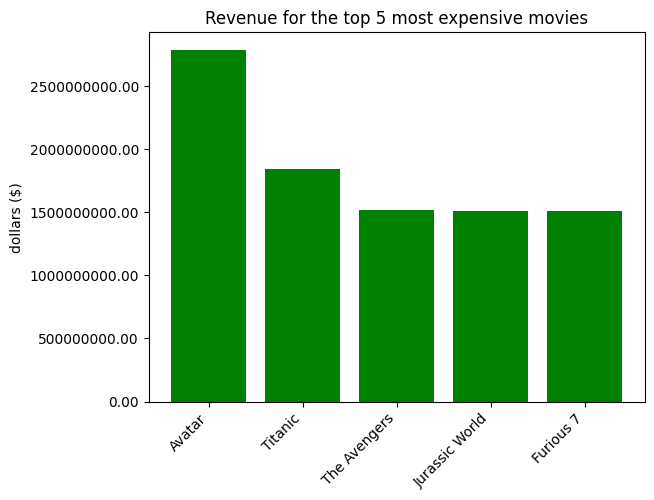

In [112]:
plt.bar(top_5_high_revenue_movies['title'], top_5_high_revenue_movies['revenue'], color='g')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylabel('dollars ($)')
plt.title('Revenue for the top 5 most expensive movies')
plt.show()

In [113]:
plt.bar(top_5_high_revenue_movies['title'], top_5_high_revenue_movies['profit'], color='g')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylabel('dollars ($)')
plt.title('Profit with Highest revenue')
plt.show()

KeyError: 'profit'

In [ ]:
if isinstance(top_5_high_revenue_movies, pd.DataFrame):
    chart_data = top_5_high_revenue_movies[['title','budget','revenue']].sort_values(['title'])
    chart_data = chart_data.dropna()
    x = chart_data['title']
    y1 = chart_data['budget']
    y2 = chart_data['revenue']
    fig, ax = plt.subplots()
    ax.bar(x, y1, label='budget')
    ax.bar(x, y2, bottom=y1, label='revenue')
    ax.legend()
    plt.title('Low Budget and Highest Revenue Movies')
    plt.xlabel('title')
    plt.ylabel('budget, revenue (dollars)')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.show()


In [114]:
top_5_high_revenue_movies

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,2009
25,200000000,"[Drama, Romance, Thriller]",597,100.025899,[United States of America],1997-11-18,1845034188,194.0,"[English, Français, Deutsch, svenska, Italiano...",Titanic,7.5,7562,1997
16,220000000,"[Science Fiction, Action, Adventure]",24428,144.448633,[United States of America],2012-04-25,1519557910,143.0,[English],The Avengers,7.4,11776,2012
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",135397,418.708552,[United States of America],2015-06-09,1513528810,124.0,[English],Jurassic World,6.5,8662,2015
44,190000000,[Action],168259,102.322217,"[Japan, United States of America]",2015-04-01,1506249360,137.0,[English],Furious 7,7.3,4176,2015


1. Avatar wasHighest profitbale movie which budget was 237 millions dollar and revenue generated was 2787 millions dollar, pure profit after deducting investment is 2550 millions dollar

2. Titanic budget was 200 millions dollar and revenue generated 1845 millions dollar, pure profit deducting 1645 millions dollar

3. Jurassic world budget was 150 millions and revenue was 1513 millions dollar, pure profit after deducting investment is 1363 millions dollar.

4. Furious 7 budget was 190 millions dollar and revenue was 1506 millions dollar, pure profit after deducting investment was 1316 millions dollar.

5. The Avengers budget 220 millions dollar and revenue generated was 1519 millions dollar, pure profit after deducting was 1299 millions dollars

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [115]:
top_5_high_revenue_movies['profit'] = top_5_high_revenue_movies['revenue'] - top_5_high_revenue_movies['budget']
top_5_expensive_movies_budget['profit'] = top_5_expensive_movies_budget['revenue'] - top_5_expensive_movies_budget['budget']

/var/folders/bh/v9rbvs_x0vb4x2901_k83_tm0000gn/T/ipykernel_3239/2627242725.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bh/v9rbvs_x0vb4x2901_k83_tm0000gn/T/ipykernel_3239/2627242725.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
top_5_expensive_movies_budget

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit
17,380000000,"[Adventure, Action, Fantasy]",1865,135.413856,[United States of America],2011-05-14,1045713802,136.0,"[English, Español]",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,665713802
1,300000000,"[Adventure, Fantasy, Action]",285,139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000
7,280000000,"[Action, Adventure, Science Fiction]",99861,134.279229,[United States of America],2015-04-22,1405403694,141.0,[English],Avengers: Age of Ultron,7.3,6767,2015,1125403694
10,270000000,"[Adventure, Fantasy, Action, Science Fiction]",1452,57.925623,[United States of America],2006-06-28,391081192,154.0,"[English, Français, Deutsch]",Superman Returns,5.4,1400,2006,121081192
4,260000000,"[Action, Adventure, Science Fiction]",49529,43.926995,[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,2012,24139100


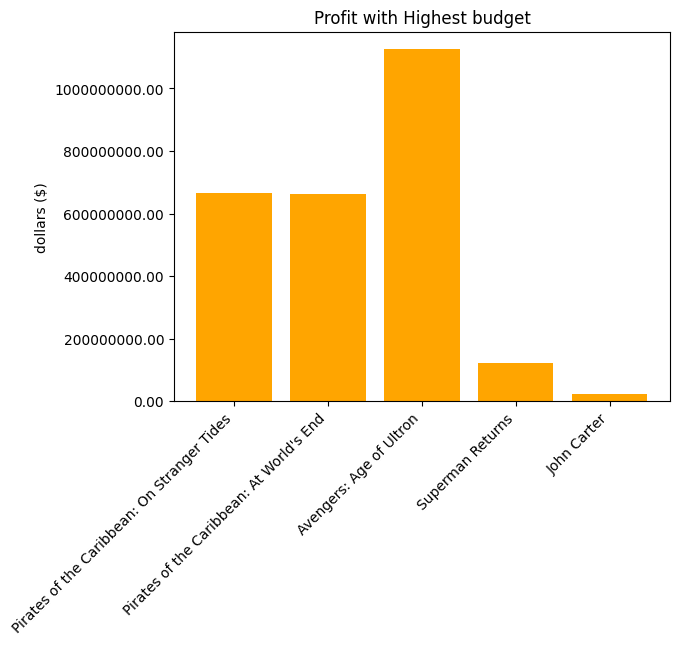

In [117]:
plt.bar(top_5_expensive_movies_budget['title'], top_5_expensive_movies_budget['profit'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylabel('dollars ($)')
plt.title('Profit with Highest budget')
plt.show()

### High budget and low investment and maximum profit

Max: Avengers Age of ultron has budget of 280 millions dollars and revenue generated was 1405.40 million dollars, where after deducting investment, pure profit was 1125.40 million dollars

Min: John Carter budget was lowest on top five movie, which was 260 million dollars and revenue genrated was very low as compare to other movies, total revenue was 284.13 million dollars, if we subtract investment and pure profit was 24million dollars

In [118]:
top_5_high_revenue_movies

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,2009,2550965087
25,200000000,"[Drama, Romance, Thriller]",597,100.025899,[United States of America],1997-11-18,1845034188,194.0,"[English, Français, Deutsch, svenska, Italiano...",Titanic,7.5,7562,1997,1645034188
16,220000000,"[Science Fiction, Action, Adventure]",24428,144.448633,[United States of America],2012-04-25,1519557910,143.0,[English],The Avengers,7.4,11776,2012,1299557910
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",135397,418.708552,[United States of America],2015-06-09,1513528810,124.0,[English],Jurassic World,6.5,8662,2015,1363528810
44,190000000,[Action],168259,102.322217,"[Japan, United States of America]",2015-04-01,1506249360,137.0,[English],Furious 7,7.3,4176,2015,1316249360


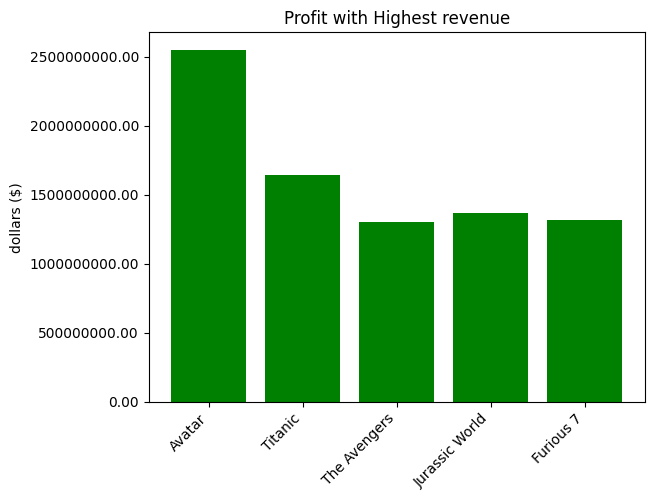

In [119]:
plt.bar(top_5_high_revenue_movies['title'], top_5_high_revenue_movies['profit'], color='green')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylabel('dollars ($)')
plt.title('Profit with Highest revenue')
plt.show()

### Highest revenue with highest profit

Avatar was Highest profitbale movie which budget was 237 millions dollar and revenue generated was 2787 millions dollar, pure profit after deducting investment is 2550 millions dollar

The Avengers budget 220 millions dollar and revenue generated was 1519 millions dollar, pure profit after deducting was 1299 millions dollars

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [120]:
#Let similary pick random 5 most popular movies
# Sort the dataframe by populatiry in descending order
movies_df.sort_values(by='popularity', ascending=False, inplace=True)
top_5_popular_movies = movies_df.head(5)
top_5_popular_movies

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,875.581305,[United States of America],2015-06-17,1156730962,91.0,[English],Minions,6.4,4571,2015
95,165000000,"[Adventure, Drama, Science Fiction]",157336,724.247784,"[Canada, United States of America, United King...",2014-11-05,675120017,169.0,[English],Interstellar,8.1,10867,2014
788,58000000,"[Action, Adventure, Comedy]",293660,514.569956,[United States of America],2016-02-09,783112979,108.0,[English],Deadpool,7.4,10995,2016
94,170000000,"[Action, Science Fiction, Adventure]",118340,481.098624,"[United Kingdom, United States of America]",2014-07-30,773328629,121.0,[English],Guardians of the Galaxy,7.9,9742,2014
127,150000000,"[Action, Adventure, Science Fiction, Thriller]",76341,434.278564,"[Australia, United States of America]",2015-05-13,378858340,120.0,[English],Mad Max: Fury Road,7.2,9427,2015


### Top five popular movies accoriding to ranks

1. Minions with 875 points
2. Interstellar with 724 points
3. Deadpool with 514 points
4. Guardians of the galaxy with 481 points
5. Max Max fury road with 434 points 

#### Find Movies which are rated above 7



In [121]:
movies_df.shape

(3229, 13)

In [122]:
movies_df.year.sort_values(ascending=False).unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973,
       1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1947, 1946, 1945, 1944, 1942, 1941, 1940, 1939,
       1938, 1937, 1936, 1935, 1934, 1933, 1932, 1930, 1929, 1927, 1925,
       1916])

In [123]:
# Sort the dataframe by populatiry in descending order
movies_df.sort_values(by='vote_average', ascending=False, inplace=True)
movies_list = movies_df.to_dict('records')
movies_list[0:1]

[{'budget': 10500000,
  'genres': ['Drama', 'Comedy'],
  'id': 88641,
  'popularity': 0.037073,
  'production_countries': ['United States of America'],
  'DateTime': Timestamp('1994-09-02 00:00:00'),
  'revenue': 123509,
  'runtime': 99.0,
  'spoken_languages': ['English'],
  'title': 'There Goes My Baby',
  'vote_average': 8.5,
  'vote_count': 2,
  'year': 1994}]

In [124]:
movie_rate_above_seven = list(filter(lambda movie: movie["vote_average"] > 7, movies_list))
movie_rate_above_seven[0:1]

[{'budget': 10500000,
  'genres': ['Drama', 'Comedy'],
  'id': 88641,
  'popularity': 0.037073,
  'production_countries': ['United States of America'],
  'DateTime': Timestamp('1994-09-02 00:00:00'),
  'revenue': 123509,
  'runtime': 99.0,
  'spoken_languages': ['English'],
  'title': 'There Goes My Baby',
  'vote_average': 8.5,
  'vote_count': 2,
  'year': 1994}]

In [125]:
movie_rate_above_seven = movies_df.query('vote_average > 7')
movie_rate_above_seven

,budget,genres,id,popularity,production_countries,DateTime,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
2970,10500000,"[Drama, Comedy]",88641,0.037073,[United States of America],1994-09-02,123509,99.0,[English],There Goes My Baby,8.5,2,1994
1881,25000000,"[Drama, Crime]",278,136.747729,[United States of America],1994-09-23,28341469,142.0,[English],The Shawshank Redemption,8.5,8205,1994
3337,6000000,"[Drama, Crime]",238,143.659698,[United States of America],1972-03-14,245066411,175.0,"[English, Italiano, Latin]",The Godfather,8.4,5893,1972
1818,22000000,"[Drama, History, War]",424,104.469351,[United States of America],1993-11-29,321365567,195.0,"[Deutsch, Polski, עִבְרִית, English]",Schindler's List,8.3,4329,1993
2731,13000000,"[Drama, Crime]",240,105.792936,[United States of America],1974-12-20,47542841,200.0,"[English, Italiano, Latin, Español]",The Godfather: Part II,8.3,3338,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,3600000,"[Drama, Romance]",451,22.030517,[United States of America],1995-10-27,49800000,112.0,[English],Leaving Las Vegas,7.1,360,1995
3453,6000000,"[Comedy, Drama, Romance]",16158,5.537646,[United States of America],1999-07-16,25059640,106.0,[English],The Wood,7.1,34,1999
3240,5000000,"[Horror, Thriller, Science Fiction]",170,45.490374,[United Kingdom],2002-10-31,82719885,113.0,"[Español, English]",28 Days Later,7.1,1777,2002
4066,1500000,"[Horror, Mystery]",8329,31.691617,[Spain],2007-04-10,30448000,78.0,"[日本語, Español]",[REC],7.1,934,2007


### There are total 637 Movies, whoes vote_average or rating is above 7

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [126]:
movies_df.year.sort_values(ascending=False).unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973,
       1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1947, 1946, 1945, 1944, 1942, 1941, 1940, 1939,
       1938, 1937, 1936, 1935, 1934, 1933, 1932, 1930, 1929, 1927, 1925,
       1916])

In [127]:
# Group the movies by year and calculate the mean revenue
movies_by_year = movies_df.groupby("year")["revenue"].mean()
# Find the year with the highest revenue
best_year = movies_by_year.idxmax()
print("The best year for movies was:", best_year)

The best year for movies was: 2016


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

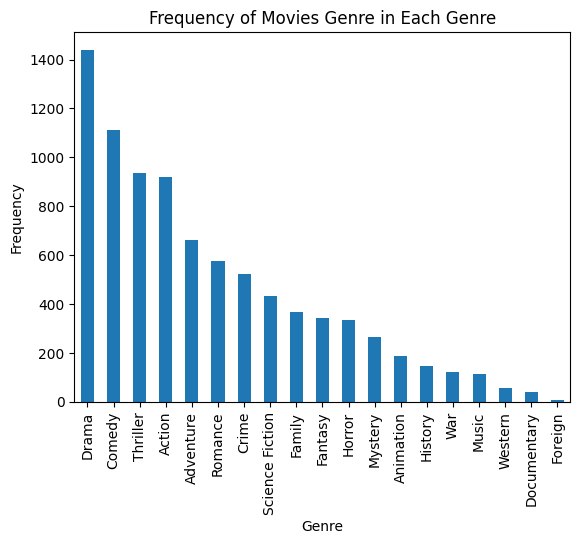

In [128]:
# Extract the genres column and create a list of all genres
genres = [genre for movie_genres in movies_df["genres"] for genre in movie_genres]
# Count the frequency of each genre
genre_counts = pd.Series(genres).value_counts()
# Plot the genre counts as a bar chart
genre_counts.plot(kind="bar")
# Add labels and title
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of Movies Genre in Each Genre")
# Show the plot
plt.show()

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)